In [ ]:
pip install tensorflow
pip install keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.15)

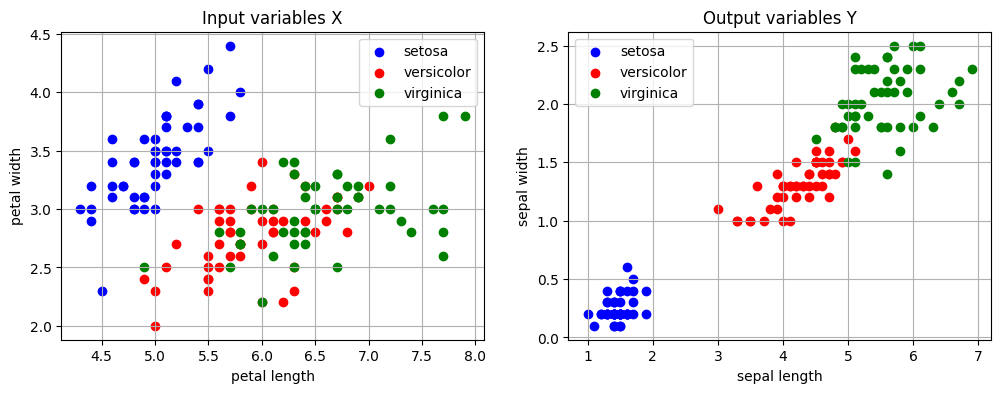

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [6]:
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='relu', name='hidden1')(i)
h = Dense(units=64, activation='relu', name='hidden2')(h)
h = Dense(units=32, activation='relu', name='hidden3')(h)
o = Dense(units=2, activation='linear', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden1 (Dense)             (None, 32)                96        
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [10]:
# Train it
MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, verbose=2, validation_split=0.1)

Epoch 1/100
29/29 - 0s - loss: 2.3370 - val_loss: 3.6326 - 475ms/epoch - 16ms/step
Epoch 2/100
29/29 - 0s - loss: 1.4800 - val_loss: 0.9092 - 64ms/epoch - 2ms/step
Epoch 3/100
29/29 - 0s - loss: 1.1076 - val_loss: 0.6150 - 56ms/epoch - 2ms/step
Epoch 4/100
29/29 - 0s - loss: 0.9641 - val_loss: 0.4538 - 64ms/epoch - 2ms/step
Epoch 5/100
29/29 - 0s - loss: 0.7618 - val_loss: 0.2406 - 56ms/epoch - 2ms/step
Epoch 6/100
29/29 - 0s - loss: 0.5772 - val_loss: 0.3756 - 64ms/epoch - 2ms/step
Epoch 7/100
29/29 - 0s - loss: 0.4609 - val_loss: 0.3524 - 58ms/epoch - 2ms/step
Epoch 8/100
29/29 - 0s - loss: 0.5483 - val_loss: 0.2711 - 49ms/epoch - 2ms/step
Epoch 9/100
29/29 - 0s - loss: 0.4468 - val_loss: 0.3738 - 56ms/epoch - 2ms/step
Epoch 10/100
29/29 - 0s - loss: 0.3961 - val_loss: 0.3033 - 57ms/epoch - 2ms/step
Epoch 11/100
29/29 - 0s - loss: 0.3702 - val_loss: 0.1713 - 56ms/epoch - 2ms/step
Epoch 12/100
29/29 - 0s - loss: 0.3111 - val_loss: 0.1916 - 81ms/epoch - 3ms/step
Epoch 13/100
29/29 - 0s

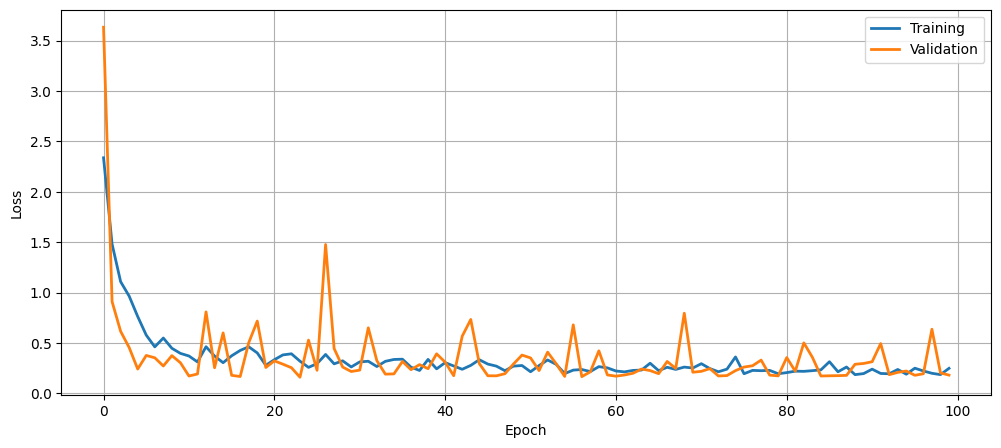

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [12]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.10164663195610046